<a target="_blank" href="https://colab.research.google.com/github/justramle/Emotion-Recognition-with-Convolutional-Neural-network/blob/main/tensorflowexample.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
train_data_dir = 'images/train/'
validation_data_dir = 'images/validation/'

In [4]:
# import os
# import tensorflow as tf

# # Set logging level to 'WARN' to reduce output verbosity
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
                                          

# tf.get_logger().setLevel('WARN')


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128
pic_size = 48
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(train_data_dir,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
validation_generator = datagen_validation.flow_from_directory(validation_data_dir,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/Users/tramle/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-14 00:35:27.380381: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-03-14 00:35:27.380411: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-03-14 00:35:27.380420: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-03-14 00:35:27.380456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 00:35:27.380468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/rep

In [8]:
%%time

# number of epochs to train the NN
epochs = 50

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(x=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


2024-03-14 00:36:13.390596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/tramle/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 149ms/step - accuracy: 0.2116 - loss: 2.1427 - val_accuracy: 0.3034 - val_loss: 1.7403
Epoch 2/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.2656 - loss: 1.8078

/Users/tramle/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
2024-03-14 00:36:48.895644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:36:48.895670: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:36:48.895674: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13531246980545168220
2024-03-14 00:36:48.895678: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:36:48.895682: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 167079764647

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.2656 - loss: 0.9079 - val_accuracy: 0.1154 - val_loss: 1.0946
Epoch 3/50


2024-03-14 00:36:48.990279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:36:48.990296: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14330614083711372212
2024-03-14 00:36:48.990306: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10122377195355092964
2024-03-14 00:36:48.990310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax/_4]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.2788 - loss: 1.8602 - val_accuracy: 0.3249 - val_loss: 1.6858
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.2734 - loss: 0.9286 - val_accuracy: 0.2308 - val_loss: 1.1793
Epoch 5/50


2024-03-14 00:37:22.481471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:37:22.481489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_26/_100]]
2024-03-14 00:37:22.481503: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:37:22.481509: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13531246980545168220
2024-03-14 00:37:22.481516: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:37:22.481520: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 165791

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.3283 - loss: 1.7451 - val_accuracy: 0.3624 - val_loss: 1.7109
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.3906 - loss: 0.7940 - val_accuracy: 0.3077 - val_loss: 1.2108
Epoch 7/50


2024-03-14 00:37:55.925344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:37:55.925362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:37:55.925375: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:37:55.925380: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:37:55.925387: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:37:55.925393: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.3649 - loss: 1.6675 - val_accuracy: 0.4193 - val_loss: 1.5190
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 0.3672 - loss: 0.8135 - val_accuracy: 0.5385 - val_loss: 0.7785
Epoch 9/50


2024-03-14 00:38:29.127775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:38:29.127810: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:38:29.127815: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:38:29.127819: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:38:29.127824: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:38:29.127851: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 972301454249752466
2024-03-14 00:38:29.127853: W tensorflow/core/framework/local_rendezv

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.3947 - loss: 1.5920 - val_accuracy: 0.4118 - val_loss: 1.5844
Epoch 10/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.4062 - loss: 0.8039 - val_accuracy: 0.4231 - val_loss: 1.0726
Epoch 11/50


2024-03-14 00:39:02.281726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:39:02.281740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:39:02.281747: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4906739488047411517
2024-03-14 00:39:02.281751: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16579191734256509593
2024-03-14 00:39:02.281754: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17688260089945798119
2024-03-14 00:39:02.281758: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15627001

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4116 - loss: 1.5415 - val_accuracy: 0.4382 - val_loss: 1.4531
Epoch 12/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.4375 - loss: 0.7405 - val_accuracy: 0.5769 - val_loss: 0.7550
Epoch 13/50


2024-03-14 00:39:35.438047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:39:35.438063: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:39:35.438067: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:39:35.438072: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:39:35.438075: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:39:35.438079: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:39:35.438083: I tensorflow/core/framework/local_rende

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4244 - loss: 1.4970 - val_accuracy: 0.4543 - val_loss: 1.4168
Epoch 14/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.4922 - loss: 0.6942 - val_accuracy: 0.6154 - val_loss: 0.6858
Epoch 15/50


2024-03-14 00:40:08.627694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:40:08.627711: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:40:08.627715: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13046156285221139008
2024-03-14 00:40:08.627720: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:40:08.627724: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:40:08.627727: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 972301454249752466
2024-03-14 00:40:08.627731: I tensorflow/core/framework/local_rendezv

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4458 - loss: 1.4501 - val_accuracy: 0.4580 - val_loss: 1.4445
Epoch 16/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.4844 - loss: 0.7092 - val_accuracy: 0.5385 - val_loss: 0.8231
Epoch 17/50


2024-03-14 00:40:41.812995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:40:41.813013: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:40:41.813018: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13531246980545168220
2024-03-14 00:40:41.813025: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:40:41.813030: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:40:41.813032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4589 - loss: 1.4016 - val_accuracy: 0.4891 - val_loss: 1.3299
Epoch 18/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.4297 - loss: 0.7333 - val_accuracy: 0.6154 - val_loss: 0.5680
Epoch 19/50


2024-03-14 00:41:14.992687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:41:14.992706: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:41:14.992711: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:41:14.992716: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:41:14.992721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:41:14.992742: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 173927037

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4791 - loss: 1.3541 - val_accuracy: 0.4759 - val_loss: 1.4098
Epoch 20/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 117us/step - accuracy: 0.4531 - loss: 0.6656 - val_accuracy: 0.6154 - val_loss: 0.6605
Epoch 21/50


2024-03-14 00:41:48.147703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:41:48.147719: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:41:48.147723: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:41:48.147727: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:41:48.147731: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:41:48.147734: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:41:48.147781: W tensorflow/core/framework/local_rende

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.4955 - loss: 1.3307 - val_accuracy: 0.4979 - val_loss: 1.3395
Epoch 22/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.4844 - loss: 0.6630 - val_accuracy: 0.5385 - val_loss: 0.7454
Epoch 23/50


2024-03-14 00:42:21.362003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:42:21.362032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:42:21.362045: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5305321276903758656
2024-03-14 00:42:21.362051: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16579191734256509593
2024-03-14 00:42:21.362059: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6641562833406052351
2024-03-14 00:42:21.362071: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 125154689

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.5049 - loss: 1.3023 - val_accuracy: 0.5355 - val_loss: 1.2362
Epoch 24/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.3828 - loss: 0.7187 - val_accuracy: 0.6923 - val_loss: 0.4530
Epoch 25/50


2024-03-14 00:42:55.060090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:42:55.060107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_24/_98]]
2024-03-14 00:42:55.060133: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:42:55.060162: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:42:55.060171: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16579191734256509593
2024-03-14 00:42:55.060177: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6641562

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.5147 - loss: 1.2728 - val_accuracy: 0.5338 - val_loss: 1.2122
Epoch 26/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.5156 - loss: 0.6348 - val_accuracy: 0.6923 - val_loss: 0.4638
Epoch 27/50


2024-03-14 00:43:28.508406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:43:28.508444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_128]]
2024-03-14 00:43:28.508469: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16579191734256509593
2024-03-14 00:43:28.508473: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10756937404797999597
2024-03-14 00:43:28.508478: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 860790562237170907
2024-03-14 00:43:28.508482: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 85491895

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.5271 - loss: 1.2323 - val_accuracy: 0.5452 - val_loss: 1.2076
Epoch 28/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.4688 - loss: 0.7040 - val_accuracy: 0.6923 - val_loss: 0.4420
Epoch 29/50


2024-03-14 00:44:02.364209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:44:02.364305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_24/_98]]
2024-03-14 00:44:02.364314: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:44:02.364321: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16579191734256509593
2024-03-14 00:44:02.364327: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:44:02.364334: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6641562

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 148ms/step - accuracy: 0.5392 - loss: 1.2228 - val_accuracy: 0.5482 - val_loss: 1.1899
Epoch 30/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.5078 - loss: 0.6269 - val_accuracy: 0.6923 - val_loss: 0.5156
Epoch 31/50


2024-03-14 00:44:35.864559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:44:35.864576: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:44:35.864607: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13046156285221139008
2024-03-14 00:44:35.864615: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:44:35.864620: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:44:35.864624: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 972301454249752466
2024-03-14 00:44:35.864629: I tensorflow/core/framework/local_rendezv

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 148ms/step - accuracy: 0.5481 - loss: 1.1978 - val_accuracy: 0.5352 - val_loss: 1.2352
Epoch 32/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.6172 - loss: 0.5699 - val_accuracy: 0.6538 - val_loss: 0.5633
Epoch 33/50


2024-03-14 00:45:09.515780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:45:09.515796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_92]]
2024-03-14 00:45:09.515813: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2527171385179387865
2024-03-14 00:45:09.515818: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 860790562237170907
2024-03-14 00:45:09.515820: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17151399761172824116
2024-03-14 00:45:09.515831: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 66415628334

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.5519 - loss: 1.1759 - val_accuracy: 0.5597 - val_loss: 1.1670
Epoch 34/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 0.5703 - loss: 0.5555 - val_accuracy: 0.6923 - val_loss: 0.4066
Epoch 35/50


2024-03-14 00:45:42.941006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:45:42.941025: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:45:42.941029: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:45:42.941033: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:45:42.941037: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:45:42.941041: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:45:42.941044: I tensorflow/core/framework/local_rende

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.5600 - loss: 1.1567 - val_accuracy: 0.5776 - val_loss: 1.1301
Epoch 36/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.5234 - loss: 0.6150 - val_accuracy: 0.7308 - val_loss: 0.3637
Epoch 37/50


2024-03-14 00:46:16.824060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:46:16.824141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1_2/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_168]]
2024-03-14 00:46:16.824158: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6641562833406052351
2024-03-14 00:46:16.824163: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17151399761172824116
2024-03-14 00:46:16.824171: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9030669273072867439
2024-03-14 00:46:16.824178: I tensorflow/core/framew

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.5643 - loss: 1.1424 - val_accuracy: 0.5817 - val_loss: 1.1271
Epoch 38/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.5938 - loss: 0.5289 - val_accuracy: 0.7692 - val_loss: 0.3382
Epoch 39/50


2024-03-14 00:46:50.231444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:46:50.231463: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:46:50.231468: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:46:50.231471: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:46:50.231475: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:46:50.231478: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:46:50.231482: I tensorflow/core/framework/local_rende

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 148ms/step - accuracy: 0.5747 - loss: 1.1195 - val_accuracy: 0.5804 - val_loss: 1.1299
Epoch 40/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.6172 - loss: 0.5615 - val_accuracy: 0.7692 - val_loss: 0.4686
Epoch 41/50


2024-03-14 00:47:23.757474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:47:23.757484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:47:23.757498: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13046156285221139008
2024-03-14 00:47:23.757510: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:47:23.757515: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:47:23.757519: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.5821 - loss: 1.1012 - val_accuracy: 0.5824 - val_loss: 1.1044
Epoch 42/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.7031 - loss: 0.4678 - val_accuracy: 0.7692 - val_loss: 0.3964
Epoch 43/50


2024-03-14 00:47:56.923128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:47:56.923151: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:47:56.923156: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:47:56.923159: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:47:56.923215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_22/_96]]
2024-03-14 00:47:56.923221: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 72094022

225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.5925 - loss: 1.0745 - val_accuracy: 0.5879 - val_loss: 1.1115
Epoch 44/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.6406 - loss: 0.4913 - val_accuracy: 0.7308 - val_loss: 0.4764
Epoch 45/50


2024-03-14 00:48:30.004895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:48:30.004910: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:48:30.004915: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:48:30.004921: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17392703739679229068
2024-03-14 00:48:30.004925: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:48:30.004929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13873236953849121724
2024-03-14 00:48:30.004951: I tensorflow/core/framework/local_rende

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 150ms/step - accuracy: 0.5988 - loss: 1.0618 - val_accuracy: 0.5472 - val_loss: 1.2111
Epoch 46/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 0.5547 - loss: 0.5917 - val_accuracy: 0.6154 - val_loss: 0.6455
Epoch 47/50


2024-03-14 00:49:03.986455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:49:03.986470: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:49:03.986474: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:49:03.986478: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:49:03.986482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_38/_112]]
2024-03-14 00:49:03.986496: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6179718

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.6018 - loss: 1.0499 - val_accuracy: 0.6084 - val_loss: 1.0644
Epoch 48/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.6016 - loss: 0.5066 - val_accuracy: 0.8077 - val_loss: 0.3531
Epoch 49/50


2024-03-14 00:49:37.735206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:49:37.735222: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1222425420006470160
2024-03-14 00:49:37.735227: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:49:37.735246: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:49:37.735254: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4868999768127931510
2024-03-14 00:49:37.735259: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 972301454249752466
2024-03-14 00:49:37.735263: W tensorflow/core/framework/local_rendezvo

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.6078 - loss: 1.0351 - val_accuracy: 0.6047 - val_loss: 1.0687
Epoch 50/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.6484 - loss: 0.4847 - val_accuracy: 0.8077 - val_loss: 0.3239
CPU times: user 6min 55s, sys: 2min 4s, total: 8min 59s
Wall time: 13min 58s


2024-03-14 00:50:11.593423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:50:11.593495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_83]]
2024-03-14 00:50:11.593538: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10735980096061350408
2024-03-14 00:50:11.593544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16707976464709493946
2024-03-14 00:50:11.593548: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6641562833406052351
2024-03-14 00:50:11.593558: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15079272004379601571
2024-03

In [9]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

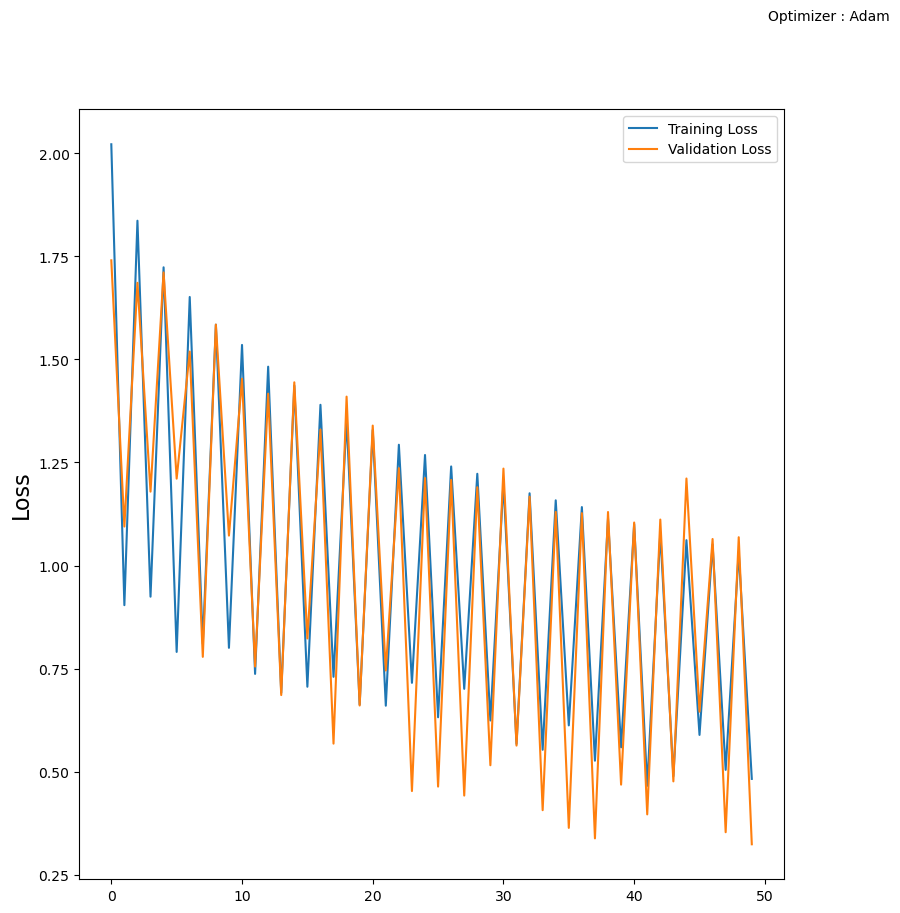

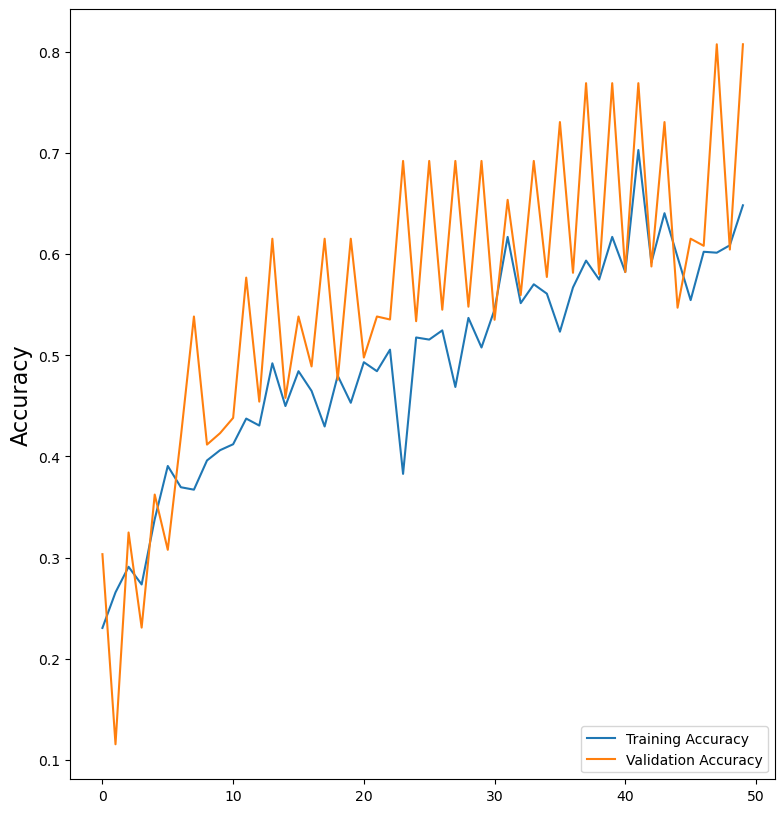

In [12]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


<Figure size 640x480 with 0 Axes>

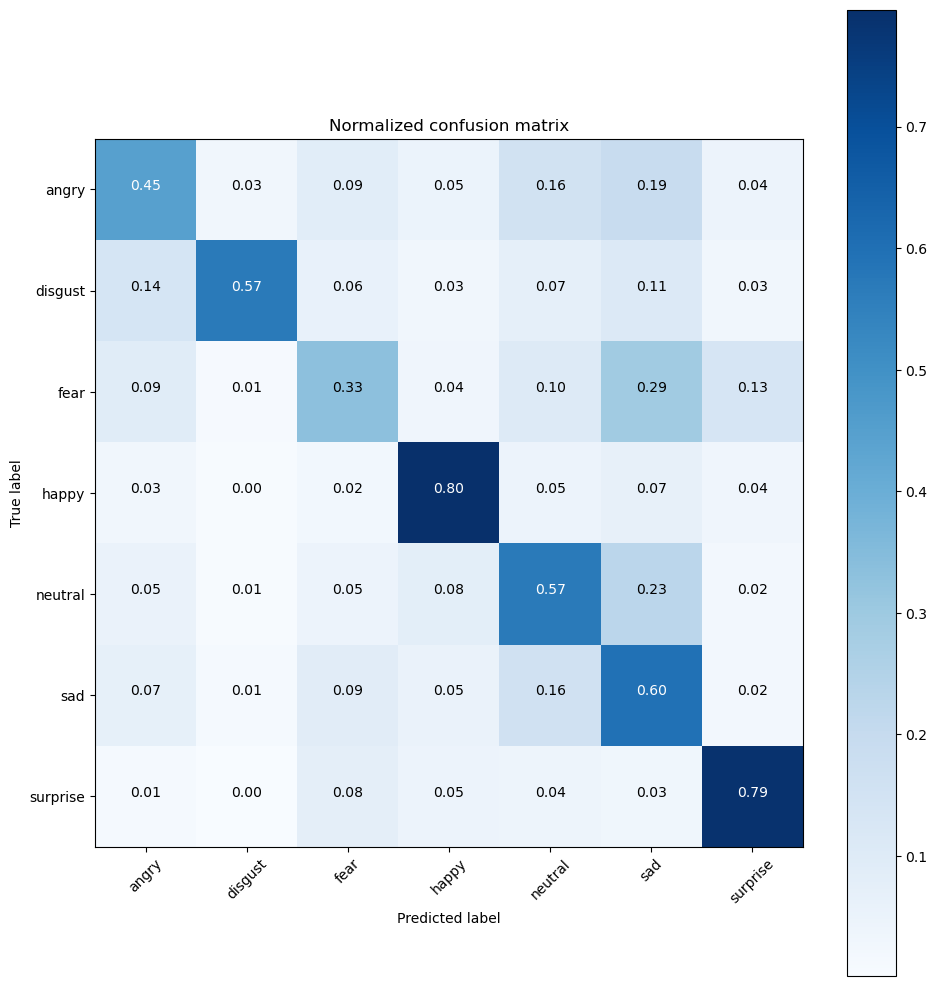

In [13]:
import numpy as np
# compute predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()